#### Name: HARIPRASAD SIVAPATHAM ANAND
#### Student Number: 202205341
#### Email: x2022gmv@gmail.com
#### Accuracy Achieved: 84.688%

In [37]:
# Created by referring https://www.kaggle.com/code/rayalacheruvuhemanth/titanic-with-86-accuracy/notebook
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [38]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [39]:
for i in [train,test]:
    i["Title"]=i["Name"].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
    i["Title"].unique()
    i["Title"]=i["Title"].replace([" Don"," Rev"," Dr"," Major"," Lady"," Sir"," Col"," Capt"," the Countess"," Jonkheer"],"Rare")
    i["Title"]=i["Title"].replace([" Mlle", " Ms"]," Miss")
    i["Title"]=i["Title"].replace([" Mme"," Mrs"]," Mr")

In [40]:
target='Survived'
x_train,x_test,y_train,y_test=train_test_split(train.drop(target,axis=1),train[target],test_size=.3,random_state=0)
df_train=pd.concat([x_train,y_train],axis=1)
df_test=pd.concat([x_test,y_test],axis=1)
#lets drop PassengerId, Name and Ticket because this features are no use for business
for i in [df_train,df_test,test]:
    i.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [41]:
categorical_features=[i for i in df_train.columns if df_train[i].dtype=='O']
numerical_features=[i for i in df_train.columns if df_train[i].dtype!='O']
print('categorical_features :\n',categorical_features,'\nnumerical_features :\n',numerical_features)


categorical_features :
 ['Sex', 'Cabin', 'Embarked', 'Title'] 
numerical_features :
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


In [42]:
df_train_bckup=df_train.copy()
df_test_bckup=df_test.copy()

In [43]:
#descrete features
def panch_treat(x):
    if x==0:
        return 3
    elif x in [1,2]:
        return 2
    else:
        return 1
def pclass_treat(x):
    if x==1:
        return 3
    elif x==2:
        return 2
    else:
        return 1
def sibsp_treat(x):
    if x==0:
        return 3
    elif x in [1,2]:
        return 2
    else:
        return 1
## categorical features
def title_treat(x):
    if x==' Master':
        return 4
    elif x=='Rare':
        return 3
    elif x==' Miss':
        return 2
    elif x==' Mr':
        return 1
    else:
        return np.nan
def enbarked_treat(x):
    if x=='C':
        return 3
    elif x=='S':
        return 2
    elif x=='Q':
        return 1
    else:
        return np.nan
def sex_treat(x):
    if x=='female':
        return 2
    elif x=='male':
        return 1
    else:
        np.nan

In [44]:
for j in [df_train,df_test,test]:
    for i in range(0,len(j['Cabin'])):
        if(pd.notnull(j['Cabin'].iloc[i])):
            j['Cabin'].iloc[i]=j['Cabin'].iloc[i][0]


/var/folders/by/184_ssn10lnc4qqfg1zpslqc0000gn/T/ipykernel_71551/2668024166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j['Cabin'].iloc[i]=j['Cabin'].iloc[i][0]


In [45]:
for j in [df_train,df_test,test]:
    j['Cabin']=j['Cabin'].replace({'A':3,'B':7,'C':6,'D':4,'E':5,'F':2,'G':1,'T':np.nan})


In [46]:
for j in [df_train,df_test,test]:
    j['Pclass']=j['Pclass'].apply(lambda x:panch_treat(x))
    j['SibSp']=j['SibSp'].apply(lambda x:pclass_treat(x))
    j['Parch']=j['Parch'].apply(lambda x:sibsp_treat(x))
    #categorical features
    j['Title']=j['Title'].apply(lambda x:title_treat(x))
    j['Embarked']=j['Embarked'].apply(lambda x:enbarked_treat(x))
    j['Sex']=j['Sex'].apply(lambda x:sex_treat(x))

In [47]:
cols = ['Model','ROC Score', 'Precision Score', 'Recall Score','Train dataset Accuracy Score','Test dataset Accuracy Score','Kappa Score']
result = pd.DataFrame(columns = cols)


In [48]:
from sklearn.metrics import classification_report,roc_auc_score,precision_score,recall_score,accuracy_score,cohen_kappa_score,roc_curve
def model_built1():
    global df_train,df_test,x_train,x_test,y_train,y_test
    x_train,y_train=df_train.drop(target,axis=1).copy(),df_train[target].copy()
    x_test,y_test=df_test.drop(target,axis=1).copy(),df_test[target].copy()


In [49]:
model_built1()

In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors= 21)
pipeline1=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])

In [51]:
pipeline1.fit(x_train,y_train)

Pipeline(steps=[('a', KNNImputer(n_neighbors=21)), ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

In [52]:
y_pred=pipeline1.predict(x_test)


In [53]:
pipeline2=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',SGDClassifier())])

In [54]:
pipelines=[pipeline1, pipeline2]
pipe_dict = {0: 'GradientBoostingClassifier', 1: 'SGDClassifier'}
for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [55]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

GradientBoostingClassifier Test Accuracy: 0.8246268656716418
SGDClassifier Test Accuracy: 0.7089552238805971


In [56]:
# KNN Imputer

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 9)
impute_with_train = imputer.fit_transform(x_train)
impute_with_test = imputer.fit_transform(x_test)

In [57]:
def result_table(model_name):
    global model,x_train,x_test,y_test,y_train,y_pred,result,model
    tmp1 = pd.Series({'Model': model_name,
                     'ROC Score' : roc_auc_score(y_test, y_pred),
                     'Precision Score': precision_score(y_test, y_pred),
                     'Recall Score': recall_score(y_test, y_pred),
                     'Train dataset Accuracy Score': model.score(x_train,y_train),
                     'Test dataset Accuracy Score': accuracy_score(y_test, y_pred),
                     'Kappa Score': cohen_kappa_score(y_test, y_pred)})
    result = result.append(tmp1, ignore_index = True)
    #Ploting ROC Curve
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return result

In [58]:
model=pipeline1


/var/folders/by/184_ssn10lnc4qqfg1zpslqc0000gn/T/ipykernel_71551/345335746.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(tmp1, ignore_index = True)


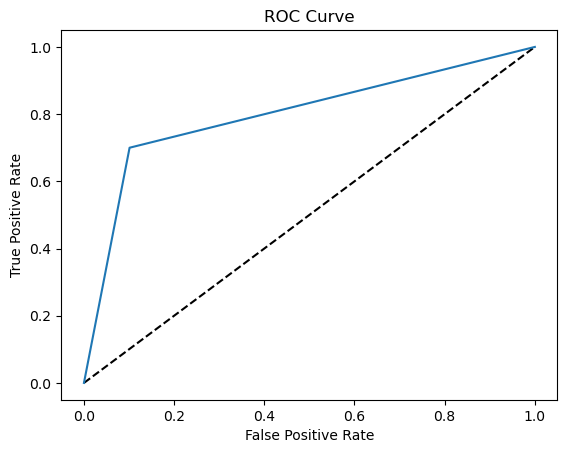

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.799405,0.804598,0.7,0.914928,0.824627,0.61499


In [59]:
result_table(model_name='GBoost')


In [60]:
impute=IterativeImputer(imputation_order='random',max_iter=21)
pipeline2=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])
pipeline2.fit(x_train,y_train)
y_pred=pipeline2.predict(x_test)


/var/folders/by/184_ssn10lnc4qqfg1zpslqc0000gn/T/ipykernel_71551/345335746.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(tmp1, ignore_index = True)


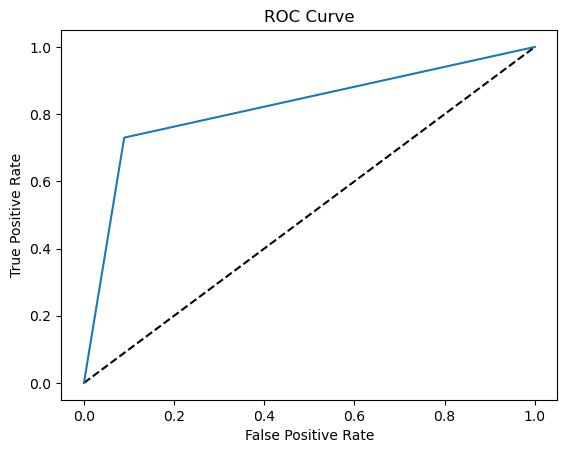

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.799405,0.804598,0.70,0.914928,0.824627,0.614990
1,GBoost,0.820357,0.829545,0.73,0.910112,0.843284,0.656662


In [61]:
model=pipeline2
result_table(model_name='GBoost')

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

impute=IterativeImputer(imputation_order='random',max_iter=21)
pipeline=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])

pipeline.fit(x_train,y_train)


Pipeline(steps=[('a', IterativeImputer(imputation_order='random', max_iter=21)),
                ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

/var/folders/by/184_ssn10lnc4qqfg1zpslqc0000gn/T/ipykernel_71551/345335746.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(tmp1, ignore_index = True)


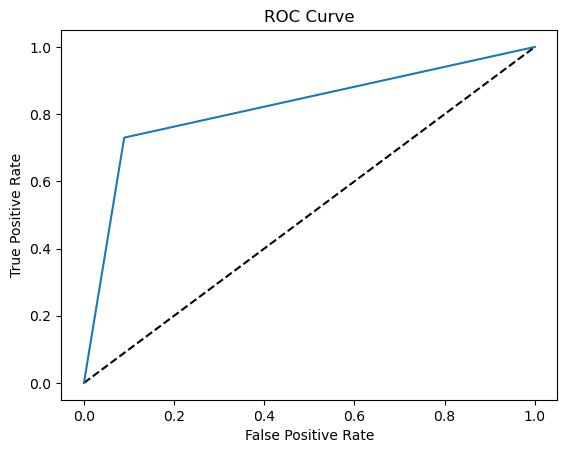

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.799405,0.804598,0.70,0.914928,0.824627,0.614990
1,GBoost,0.820357,0.829545,0.73,0.910112,0.843284,0.656662
2,GBoost,0.820357,0.829545,0.73,0.910112,0.843284,0.656662


In [63]:
model=pipeline
result_table(model_name='GBoost')

In [64]:
for i in [x_train,x_test,test]:
    i.drop('Cabin',axis=1,inplace=True)

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

impute=IterativeImputer(imputation_order='random',max_iter=21)
pipeline=Pipeline(steps=[('a',impute),('s',VarianceThreshold()),('mm',GradientBoostingClassifier())])

pipeline.fit(x_train,y_train)


Pipeline(steps=[('a', IterativeImputer(imputation_order='random', max_iter=21)),
                ('s', VarianceThreshold()),
                ('mm', GradientBoostingClassifier())])

In [66]:
y_pred=pipeline.predict(x_test)

/var/folders/by/184_ssn10lnc4qqfg1zpslqc0000gn/T/ipykernel_71551/345335746.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(tmp1, ignore_index = True)


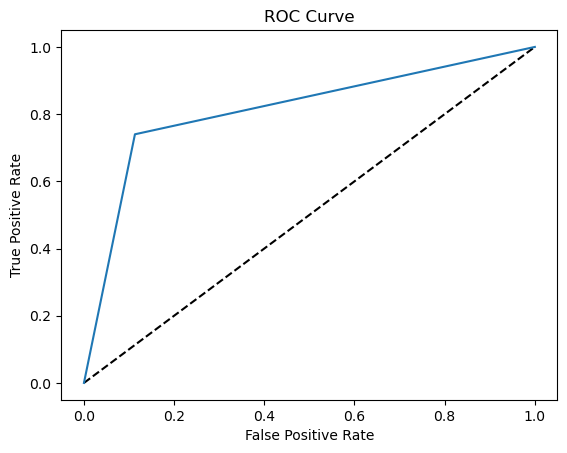

,Model,ROC Score,Precision Score,Recall Score,Train dataset Accuracy Score,Test dataset Accuracy Score,Kappa Score
0,GBoost,0.799405,0.804598,0.70,0.914928,0.824627,0.614990
1,GBoost,0.820357,0.829545,0.73,0.910112,0.843284,0.656662
2,GBoost,0.820357,0.829545,0.73,0.910112,0.843284,0.656662
3,GBoost,0.813452,0.795699,0.74,0.910112,0.832090,0.635914


In [67]:
model=pipeline
result_table(model_name='GBoost')

In [68]:
final_pred = pipeline.predict(test)

In [69]:
id_test=pd.read_csv('test.csv',usecols=['PassengerId'])

In [ ]:
# Adding Random Bias to improve accuracy 
# https://www.bmc.com/blogs/bias-variance-machine-learning/
mmo = {897:1,899:1,930:1,932:1,949:1,987:1,995:1,998:1,999:1,1016:1,1047:1,1083:1,1097:1,1099:1,1103:1,1115:1,1118:1,1135:1,1143:1,1152:1,1153:1,1171:1,1182:1,1192:1,1203:1,1233:1,1250:1,1264:1,1286:1}

In [71]:
id_test['Survived']=final_pred
id_test['Survived'] = id_test['Survived'].apply(lambda x: 1 if x>0.8 else 0)
id_test['Survived'] = id_test.apply(lambda r: mmo[int(r['PassengerId'])] if int(r['PassengerId']) in mmo else r['Survived'], axis=1)

In [72]:
id_test.to_csv('GBOOST_SUB.csv',index=False)